# <center> Learning the topology of a Bayesian Network from a database of cases using the K2 algorithm 

### Aidin Attar 
### Ema Baci 2050726


## Imports


In [4]:
library(IRdisplay)
library(dplyr)
library(bnlearn)
library(Rgraphviz)

ERROR: Error in library(bnlearn): non c'è alcun pacchetto chiamato ‘bnlearn’


The aim of this project is to build a probabilistic network from the following database D:

In [1]:
# input of the dataset
case  <- 1:10
x1    <- c(1,1,0,1,0,0,1,0,1,0)
x2    <- c(0,1,0,1,0,1,1,0,1,0)
x3    <- c(0,1,1,1,0,1,1,0,1,0)

D <- data.frame(case, x1, x2, x3)
D

case,x1,x2,x3
<int>,<dbl>,<dbl>,<dbl>
1,1,0,0
2,1,1,1
3,0,0,1
4,1,1,1
5,0,0,0
6,0,1,1
7,1,1,1
8,0,0,0
9,1,1,1


Where each record (row) is called $case$.
In particular we want to study the dependencies among the variables Z = {x1, x2, x3} in D. 

The idea is to build an algorithm that provides the most probable (higher posterior) dependencies structure bewteen the 3 variables in Z given D and some assumptions about our prior probabilistic knowledge on the domain.

#### Assumptions for computing $P(B_s, D)$
* 1- The database variables, which we denote as Z, are discrete.
* 2- Cases occur independently, given a belief-network model.
* 3- There are no cases that have variables with missing values.
* 4- The likelihood function f(Bp|Bs) is uniform.

The scheme reported below is an example of a belief-network structure $B_s$, where the nodes representes our variables and the archs representes the dependencies.

A Bayesian belief-network structure, $B_s$, is augmented by a set of probabilities, $B_p$, to form a Bayesian belief network B. Thus, B =($B_s$, $B_p$).

Example of Bs

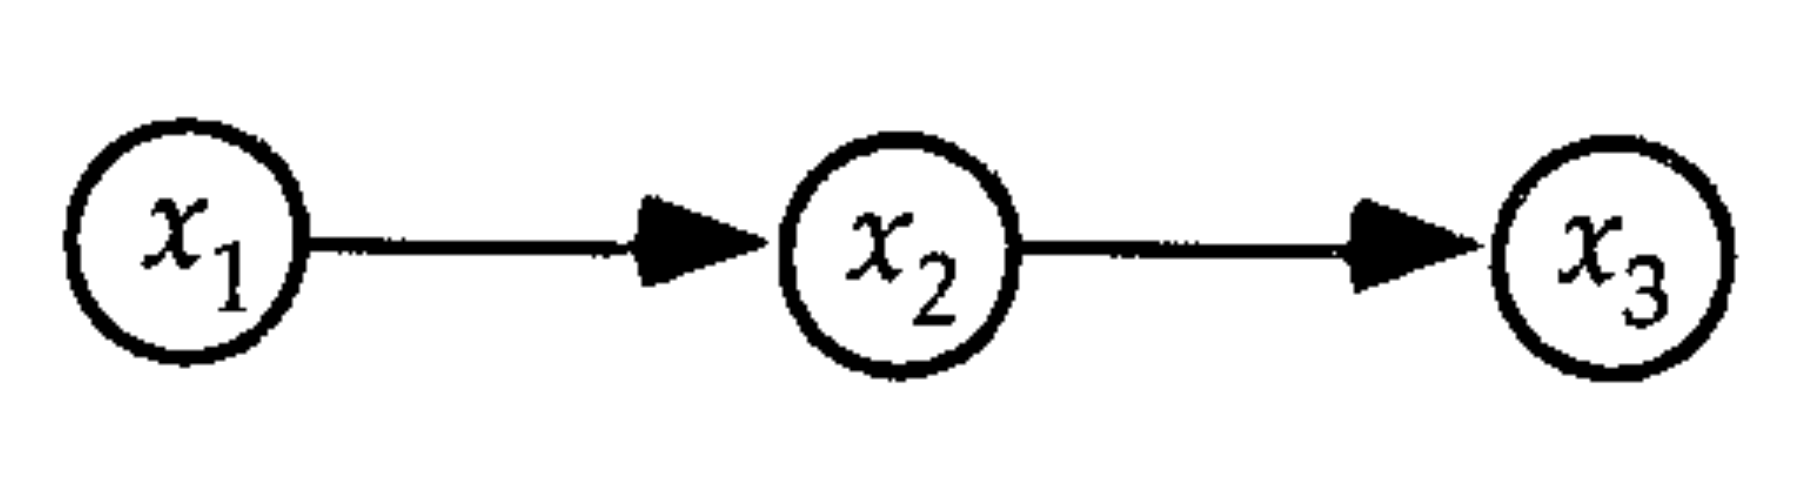

Example of Bp: for each node in a belief-network structure, there is a conditional-probability function that relates 
this node to its immediate predecessors (parents) and if a node has no parents, then a prior-probability function 
is provided.

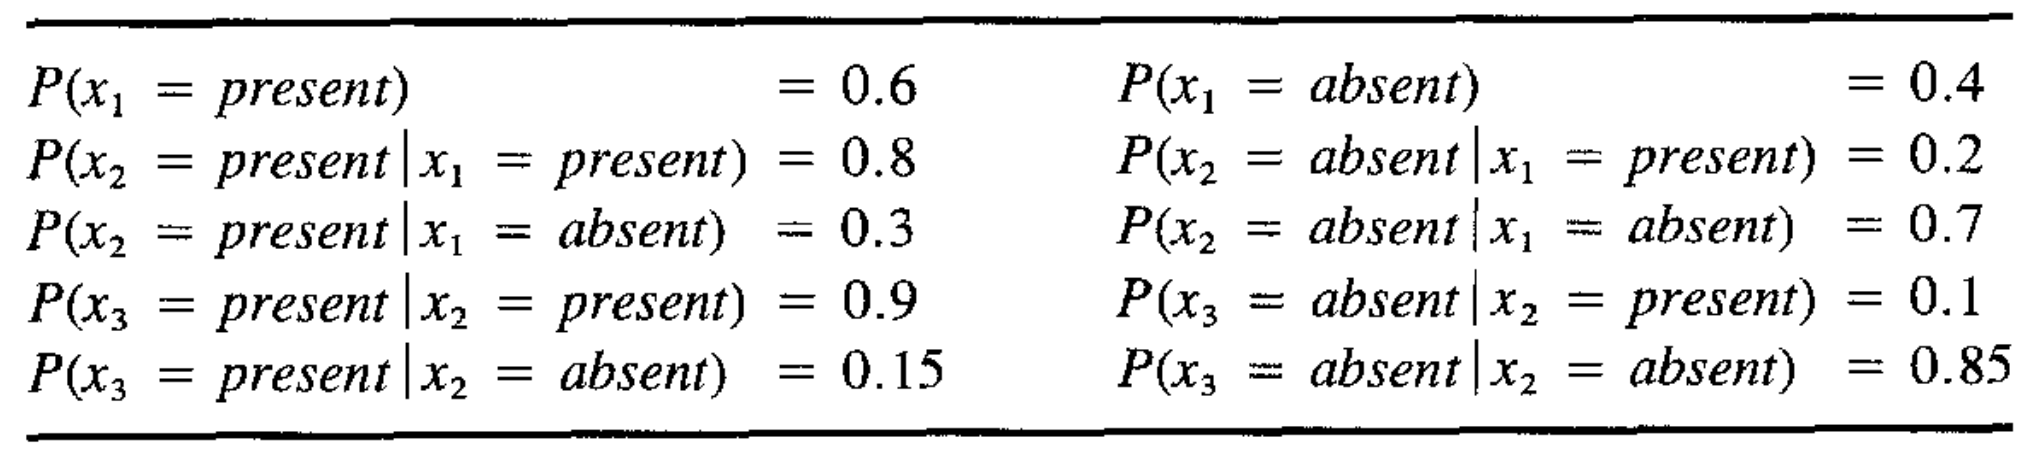

In [5]:
h = 70
cat('Example of Bs')
display_png(file="Belief_network_ex.png", width = 3*h, height =h ) 
cat('Example of Bp: for each node in a belief-network structure, there is a conditional-probability function that relates 
this node to its immediate predecessors (parents) and if a node has no parents, then a prior-probability function 
is provided.')
display_png(file="prob_assignment.png", width = 10*h, height =2*h )  

#### Notation
* m: number of cases in D
* n: number of variables in D
* $Z = \{x\}_i$, i = 1,..,n set of variables
* $v_i = \{v_{i1},...,v_{ir_i}\}$ : possible value assignments to $x_i$
* $r_i$: number of possible value assigned to $x_i$
* $parents \space of\space x_i$: variables related to $x_i$
* $\pi_i$: set of parents related to $x_i$
* $w_{ij}$: a value of $\pi_i$
* $w_i = \{ w_{ij}, j = 1,..,r_j\}$ unique instantiation of $\pi_i$ relative to D. 
* $q_i$ = size of $w_i$ 
* $N_{ijk}$: number of cases in D in which variable $x_i$ has the value $v_{ik}$ and $\pi_i$ is instantiated as $w_{ij}$


#### In our problem: 

* m = 10
* n = 3
* Z = {$x_1$, $x_2$, $x_3$}
* $r_1$ = $r_2$ = $r_3$ = 2
* $v_i = (v_{1i},...,v_{ir_i})$ = $(v_{i1},v_{i2})$=(0,1) 
* $q_1$ = $q_2$ = $q_3$ = 2
* $w_i = (w_{i1},...,w_{iq_i})$ = $(w_{i1},w_{i2})$=(0,1) 


* $N_{111}$ = dove $x_1$ ha il valore 0 e i suoi parents anche (non ha parents) = 5
* $N_{112}$ = 5
* $N_{121}$ = 5
* $N_{122}$ = 5

* $N_{211}$ = 4 dove $x_2$ ha il valore 0 e i suoi parenti ($x_1$) anche
* $N_{212}$ = 1 dove $x_2$ ha il valore 1 e i suoi parenti ($x_1$) 0 
* $N_{221}$ = 1
* $N_{222}$ = 4

* $N_{311}$ = ($x_3$ = 0, $x_2$ = 0) = 4
* $N_{312}$ = ($x_3$ = 1, $x_2$ = 0) = 1
* $N_{321}$ = ($x_3$ = 0, $x_2$ = 1) = 0
* $N_{322}$ = ($x_3$ = 1, $x_2$ = 1) = 5

### Finding the most probable belief-network structures
ADD SCHEME WITH ALL THE POSSIBLE 25 Bs


We want to find the belief-network structures Bs that maximize P(Bs|D)(should be more than one).

If we assume a uniform prior, then finding Bs that maximize the posterior P(Bs|D) is equal to find the ones that maximize the likelihood P(Bs|D) that can be done just computing P(Bs|D) for every possibile Bs trought the formula above (mettere la formula) but should be computational demanding for bigger datasets so we will implement an heuristic method instead.

In particular, we use an algorithm that begins by making the assumption that a node has no parents, and then adds incrementally that parent whose addition most increases the probability of the resulting structure.When the addi- tion of no single parent can increase the probability, we stop adding parents to the node.

We also shall use a function Pred(xi) that returns the set of nodes that precede xi in the node ordering.

In [6]:
xi <- D$x1
pi <- c(D$x2, D$x3)
f(xi, pi)

ERROR: Error in f(xi, pi): non trovo la funzione "f"


In [7]:
score <- function(x.i, pi.i){
    '
    Function to compute the score: it represents the probability of the 
    database D given that the parents of x.i are pi.i

    Inputs:
        - x.i: list containing the i-th node of the database
        - pi.i: list of parents of node x.i

    Output:
        - probability of database given pi.i as parents of x.i
    '

    r.i <- length(unique(unlist(x.i)))
    
    # case without parents
    if(length(pi.i)==0){
        alpha <- table(x.i)
        N     <- sum(alpha)
        prob  <- factorial(r.i-1)/factorial(N+r.i-1)*prod(sapply(alpha,factorial))
    }

    # standard version with parents
    else{
        data  <- append(x.i,pi.i)
        alpha <- table(data)
        # recast in a matrix
        if (length(dim(alpha))>2){dim(alpha)<-c(r.i,length(alpha)/r.i)}
        # transpose
        alpha<-t(alpha)
        N.j <- rowSums(alpha)
        M.j <- apply(apply(alpha, c(1,2), factorial),1,prod)
        prob <- prod(apply(cbind(N.j,M.j),1, function(x) x[2]*factorial(r.i-1)/factorial(x[1] + r.i - 1)))
    }

    return(prob)
}

In [8]:
K2 <- function(data, order=c(1,2,3), max.parents=2, output.prob=TRUE) {
    '
    K2 algorithm to learn the topology of a Bayesian Network.

    Input:
        - data: data.frame with n+1 columns (the first one is the case column)
        - order: vector with the ordering of the nodes in data
        - max.parents: upper bound on the number of parents a node may have
    Output:
        - 
    '
    # convert database to a list of vectors
    nodes <- as.list(data[, order+1])
    # number of nodes
    n <- length(nodes)
    
    # empty vector to store the parents of each node
    parents <- rep(NULL, 0)
    
    output.list <- list()
    g.nodes <- names(nodes)
    dag <- empty.graph(nodes=g.nodes)
    k2.score <- 0

    for( i in 1:n ){
        parents[i] <- c()
        p.old <- score(nodes[i], parents[i])
        
        ok.to.proceed <- TRUE
        pred_xi <- order[1:i-1]

        while(ok.to.proceed & length(parents)<max.parents){
            diff   <- append(parents, setdiff(pred_xi, parents))
            # create a list with the possible parent nodes to inspect
            unions <- nodes[diff]
            
            # node in Pred(x.i)-pi.i that maximizes score
            p.new <- 0
            id    <- 0
            
            for(j in 1:length(unions)){
                if(length(unions)==0){
                    z.new <- score(nodes[i], NULL)
                    if(z.new>p.new){
                        p.new <- z.new
                        id    <- j
                    }
                }    
                else{
                    z.new <- score(nodes[i], unions[j])
                    if(z.new>p.new){
                        p.new <- z.new
                        id    <- j
                    }
                }
            }

            if(p.new>p.old){
                p.old <- p.new
                pi.i  <- unions[id]
                
                for (p in names(pi.i)){
                    dag <- set.arc(dag, from=p, to=g.nodes[i])
                }
            }
            else{
                ok.to.proceed <- FALSE
            }
        }
        k2.score <- k2.score + p.old
    }
    
    if (output.prob){
        set <- data.frame(apply(data[2:ncol(data)],c(1,2),as.character), stringsAsFactors = TRUE)
        print(bn.fit(dag, data = set, method = 'bayes'))
    }                                                     
                                                         
    graphviz.plot(dag)                                                     
    output.list["score"] <- k2.score
    output.list["dag"] <- list(dag)
    return(output.list)   
}

K2(D, output.prob = FALSE)

ERROR: Error in empty.graph(nodes = g.nodes): non trovo la funzione "empty.graph"


## Alternative

In [9]:
f <- function(xi, pi){

    vi <- sort(unique(xi)[ , 1])
    ri <- length(vi)
    
    wi <- c()
    qi <- 0
    for (i in 1:length(pi)){
        wi <- c(wi, sort(unique(pi[i])[, 1]))
        qi <- qi + length(sort(unique(pi[i])[, 1]))
       }
    
    N <- matrix(nrow = ri, ncol = qi)
    f <- 1
    for (i in 1:length(pi)){
        for (j in 1:qi){
            for (k in 1:ri){
                N[row = k, col = j] <- sum(xi == vi[k] & pi[i] == wi[j])
            }
        f <- f*factorial(ri-1)*prod(factorial(N[, col = j]))/factorial(sum(N[, col = j])+ri-1)
        }
    }
    
    return (f)
}


In [10]:
Pred <- function(i){
    if(i >= 2){
        return <- seq(1,i-1)
    }
    }

In [11]:
K2 <- function(n, ord ,u, D) {
    
# Input: A set of n nodes = 3  
#        an ordering on the nodes, (permutation of {1,2,3}) 
#        an upper bound u on the number of parents a node may have (n-1), 
#        a database D containing m cases
# Output: For each node, a printout of the parents of the node.}
    Output <- list()
    for (i in 1:n){
        pi_i  <- data.frame(dummy <-rep(0, 10)) 
        P_old <- f(D[ord[i]+1], pi_i )

        OKToProceed <- 'True'
        pi      <- list()
        pi[[1]] <- pi_i
        P_new   <- c()
        z       <- Pred(i)
        while (OKToProceed == 'True' & (length(pi)) < u ){
    
            if(length(z)>=1){
                pi[[2]] <- D[z+1]
                for (j in 1:length(z)){
                pi[[j+2]] <- D[j+1]
                }
            } 
            
            for (k in pi){
                P_new <- f(D[ord[i]+1],k)
                if(P_new > P_old){
                    P_old   <- P_new
                    
                }
                else{OKToProceed <- 'False'}
                 Output[[i]] <- c(P_old, k) 
            }
        }
            

    }
   return (Output)
}

In [12]:
ord <-c(1,2,3)
K2(3,ord,  2, D)

[[1]]
[[1]][[1]]
[1] 0.0003607504

[[1]]$dummy....rep.0..10.
 [1] 0 0 0 0 0 0 0 0 0 0


[[2]]
[[2]][[1]]
[1] 0.001111111

[[2]]$x1
 [1] 1 1 0 1 0 0 1 0 1 0


[[3]]
[[3]][[1]]
[1] 0.005555556

[[3]]$x2
 [1] 0 1 0 1 0 1 1 0 1 0